In [1]:
# dot product of keyphrase comparison (weighted)

### Installation script
```
conda create -n ner python=3.6
source activate ner
conda install -c conda-forge spacy -y
conda install ipython jupyter nb_conda nltk numpy matplotlib -y
conda install -c conda-forge rake_nltk -y
python -m spacy download en
python -m spacy download en_core_web_sm
python -m spacy download en_core_web_lg

conda install jupyter nb_conda ipykernel six wikipedia -y
conda install -c conda-forge google-api-python-client -y
pip install --upgrade google-cloud-language
pip install wikipedia

export GOOGLE_APPLICATION_CREDENTIALS="/Users/hkmac/keys/gcp.json"
export 'GOOGLE_APPLICATION_CREDENTIALS="/path/to/google_api_key"' >> ~/.bashrc

```


# Testing sample code

now we use Google API to extract the keywords

In [37]:
claim = "Barack Obama is born in Kenya"
text = "Kenyan-born Obama is taking our guns away."
# text = '''Malaysia has successfully received a helpline from China, with the US$20 billion High Speed Rail project cancelled without any condition. China’s project contractor, China Communications Communication Co Ltd, said in their press release they had since laid off more than 1,800 of the 2,250 employees hired for the East Coast Rail Link project – the High Speed Rail equivalent between Singapore and Malaysia.

# According to Malaysia Prime Minister Mahathir Mohamad, the project would be cancelled until the country’s finance improved. Malaysia is currently under a trillion RM debt, incurred through corruptions under former Malaysia PM Najib Razak. China’s Foreign Minister Lu Kang expressed China’s understanding and highlighted the need for a common consensus:

# “Mahathir had said during his visit that China’s development was an opportunity for Malaysia. Both countries’ peoples benefit from their trade and business relations. But in the cooperation between any two countries, it can’t be avoided that there may be various kinds of problems, and different views at different times. Such differences should be appropriately resolved by friendly consultations, and that it was an important consensus reached by both countries.”

# Malaysia’s closest neighbour, Singapore, however refused to empathise with Malaysia and demanded a hefty payout on top of the contracted penalty of US$125 million. Singapore’s Transport Minister Khaw Boon Wan had repeatedly blamed Malaysia for not issuing “an official notice”, and threatened that the project is incurring costs up to S$250 million which he said will claim a portion from Malaysia.

# The move from Singapore is no surprise as the Singapore’s ruling party government wants to see the bankruptcy and failure of the new Malaysian government. As many Singaporeans have been encouraged by Malaysia’s new regime change away from dictatorship rule, a similar collapse of the ruling party PAP is expected in the coming election in 2019. The Singapore government is hoping to trip up Malaysia’s new government, and use their neighbour’s failure as a threat against anti-establishment vote.
# '''

In [38]:
import argparse
import sys

from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import six

# from snippets import do_everything

In [69]:
# [START language_entities_text]
def entities_text(text, debug=False):
    """Detects entities in the text."""
    client = language.LanguageServiceClient()

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    # Instantiates a plain text document.
    # [START language_python_migration_entities_text]
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detects entities in the document. You can also analyze HTML with:
    #   document.type == enums.Document.Type.HTML
    entities = client.analyze_entities(document).entities

    # entity types from enums.Entity.Type
    entity_type = ('UNKNOWN', 'PERSON', 'LOCATION', 'ORGANIZATION',
                   'EVENT', 'WORK_OF_ART', 'CONSUMER_GOOD', 'OTHER')

    entity_name_list = []
    
    for entity in entities:
        entity_name_list.append([entity.salience, entity.name])
        if debug:
            print('=' * 20)
            print(u'{:<16}: {}'.format('name', entity.name))
            print(u'{:<16}: {}'.format('type', entity_type[entity.type]))
            print(u'{:<16}: {}'.format('metadata', entity.metadata))
            print(u'{:<16}: {}'.format('salience', entity.salience))
            print(u'{:<16}: {}'.format('wikipedia_url',
                  entity.metadata.get('wikipedia_url', '-')))
    
    return entity_name_list
    
    # [END language_python_migration_entities_text]
# [END language_entities_text]

In [70]:
print(entities_text(text))
print(entities_text(claim))

[[0.6520990133285522, 'Donald Trump'], [0.21015027165412903, 'idiot'], [0.08425221592187881, 'person'], [0.05349848046898842, 'fun']]
[[0.7983086109161377, 'Donald trump'], [0.20169135928153992, 'reporter']]


In [42]:
# r1 = Rake()
# r1.extract_keywords_from_text("In August 2018, adhesive replicas of President Donald Trump's recently-destroyed star were placed on the Walk of Fame on Hollywood Boulevard.")
r1_scored = entities_text(text)

name            : Kenyan
type            : LOCATION
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x10503d7b0>
salience        : 0.6280301213264465
wikipedia_url   : https://en.wikipedia.org/wiki/Kenya
name            : Obama
type            : PERSON
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x10503d080>
salience        : 0.25501739978790283
wikipedia_url   : https://en.wikipedia.org/wiki/Barack_Obama
name            : guns
type            : CONSUMER_GOOD
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x10503db70>
salience        : 0.11695248633623123
wikipedia_url   : -


In [43]:
# r2 = Rake()
# r2.extract_keywords_from_text("Someone pasted stars for Donald Trump.")
r2_scored = entities_text(claim)

name            : Barack Obama
type            : PERSON
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x10503d080>
salience        : 0.6612948775291443
wikipedia_url   : https://en.wikipedia.org/wiki/Barack_Obama
name            : Kenya
type            : LOCATION
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x10503de40>
salience        : 0.3387051224708557
wikipedia_url   : https://en.wikipedia.org/wiki/Kenya


spaCy vectors

In [44]:
import spacy
import numpy as np
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_lg')
tokens = nlp(u'dog cat banana Obama')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)
    print(np.shape(token.vector))
    plt.plot(token.vector)

/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


dog True 7.0336733 False
(300,)
cat True 6.6808186 False
(300,)
banana True 6.700014 False
(300,)
Obama True 7.414071 False
(300,)


# Comparing phrases with max-min pooled word vectors

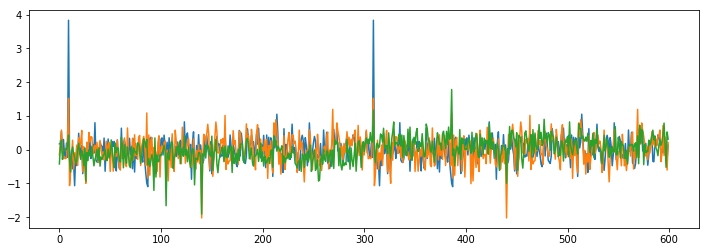

In [45]:
import numpy as np


# tokens1 = nlp(u'President')
# tokens2 = nlp(u'Obama')
# tokens3 = nlp(u'Trump Jr')

def phrase_vect(text):
    tokens = nlp(text)
    maxpool = np.maximum.reduce([token.vector for token in tokens])
    minpool = np.minimum.reduce([token.vector for token in tokens])
    # https://stackoverflow.com/questions/21816433/
    result = np.concatenate((minpool,maxpool))
    return result

# def phrase_vect(tokens):
#     maxpool = np.maximum.reduce([token.vector for token in tokens])
#     minpool = np.minimum.reduce([token.vector for token in tokens])
#     result = np.concatenate((minpool,maxpool))
#     plt.plot(result)
#     return result
    
vector1 = phrase_vect(u'President')
vector2 = phrase_vect(u'Obama')
vector3 = phrase_vect(u'Trump Jr')

plt.figure(figsize=(12,4))
plt.plot(vector1)
plt.plot(vector2)
plt.plot(vector3)


In [46]:
def cosine(u,v):
#     print(np.shape(u))
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

In [47]:
cosine(vector1,vector2)

0.4542843

In [48]:
# ok building a color plot instead

In [49]:
phrase_list = [
    "President of the United States",
    "POTUS",
    "President",
    "President Obama",
    "Barack Obama",
    "Obama",
    "Osama",
    "President Clinton",
    "Bill Clinton",
    "Clinton",
    "Hillary Clinton",
    "Hillary",
    "Trump",
    "Trump Jr",
    "Donald Trump",
    "President Trump",
    "Ice Cream",
    "Lee Kuan Yew",
    "Python",
    "Singapore"
]

In [50]:
def meshgrid(x,y): # DW code !!!
    return (
        [[x_ for x_ in x] for  _ in y],
        [[y_ for  _ in x] for y_ in y])

pair_mesh = meshgrid(phrase_list, phrase_list)
value_mesh = meshgrid([0]*len(phrase_list), [0]*len(phrase_list))

import numpy as np
for i,_ in enumerate(pair_mesh[0]):
    for j,_ in enumerate(pair_mesh[0][0]): 
        phrase1 = pair_mesh[0][i][j]
        phrase2 = pair_mesh[1][i][j]
        
#         tokens1 = nlp(phrase1)
#         tokens2 = nlp(phrase2)
        
        vector1 = phrase_vect(phrase1)
        vector2 = phrase_vect(phrase2)
        
        value_mesh[0][i][j] = cosine(vector1, vector2)

(20, 20)


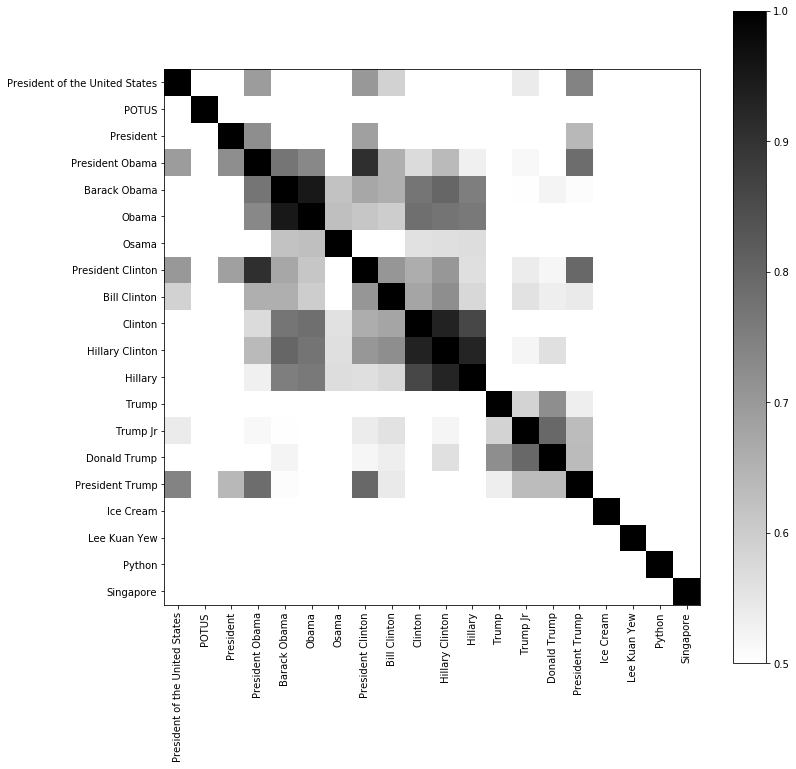

In [51]:
import matplotlib.pyplot as plt
print(np.shape(value_mesh[0]))
# fig, ax = plt.subplots(1,1)

# ax.imshow(value_mesh[0])
plt.figure(figsize=(12,12))
plt.imshow(np.transpose(value_mesh[0]), cmap='gray_r')
plt.clim(0.5,1)
plt.yticks(np.arange(len(phrase_list)), phrase_list)
plt.xticks(np.arange(len(phrase_list)), phrase_list, rotation='vertical')
plt.colorbar()
plt.show()

## Comparing claim with text


In [52]:
claim = "Obama is born in Kenya."
text = "Kenya born Obama is a secret Muslim and he is taking our guns away."

In [54]:
r1_scored = entities_text(claim)
print(r1_scored)

r2_scored = entities_text(text)
print(r2_scored)

name            : Obama
type            : PERSON
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x12bbe27b0>
salience        : 0.9005488753318787
wikipedia_url   : https://en.wikipedia.org/wiki/Barack_Obama
name            : Kenya
type            : LOCATION
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x12bbe24e0>
salience        : 0.09945113211870193
wikipedia_url   : https://en.wikipedia.org/wiki/Kenya
[[0.9005488753318787, 'Obama'], [0.09945113211870193, 'Kenya']]
name            : Obama
type            : PERSON
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x12bbe2850>
salience        : 0.6134647130966187
wikipedia_url   : https://en.wikipedia.org/wiki/Barack_Obama
name            : Kenya
type            : LOCATION
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x12bc7f8a0>
salience        : 0.22003260254859924
wikipedia_url   : https://en.wikipedia.org

In [55]:
# assign vectors
r1_scored_vec = [[claim_keyword_tuple[0], 
                  claim_keyword_tuple[1], 
                  phrase_vect(claim_keyword_tuple[1])] for claim_keyword_tuple in r1_scored]
print(len(r1_scored_vec))
print(len(r1_scored_vec[0]))

r2_scored_vec = [[text_keyword_tuple[0], 
                  text_keyword_tuple[1], 
                  phrase_vect(text_keyword_tuple[1])] for text_keyword_tuple in r2_scored]
print(len(r1_scored_vec))
print(len(r1_scored_vec[0]))

2
3
2
3


In [56]:
# compare statements

pair_mesh = meshgrid(r1_scored_vec, r2_scored_vec)
value_mesh = meshgrid([0]*len(r1_scored_vec), [0]*len(r2_scored_vec))

import numpy as np
for i,_ in enumerate(pair_mesh[0]):
    for j,_ in enumerate(pair_mesh[0][0]): 
        vector1 = pair_mesh[0][i][j][2]
        vector2 = pair_mesh[1][i][j][2]
        
        value_mesh[0][i][j] = cosine(vector1, vector2)

In [57]:
print([keyword_tuple[1] for keyword_tuple in r1_scored_vec])

['Obama', 'Kenya']


(4, 2)


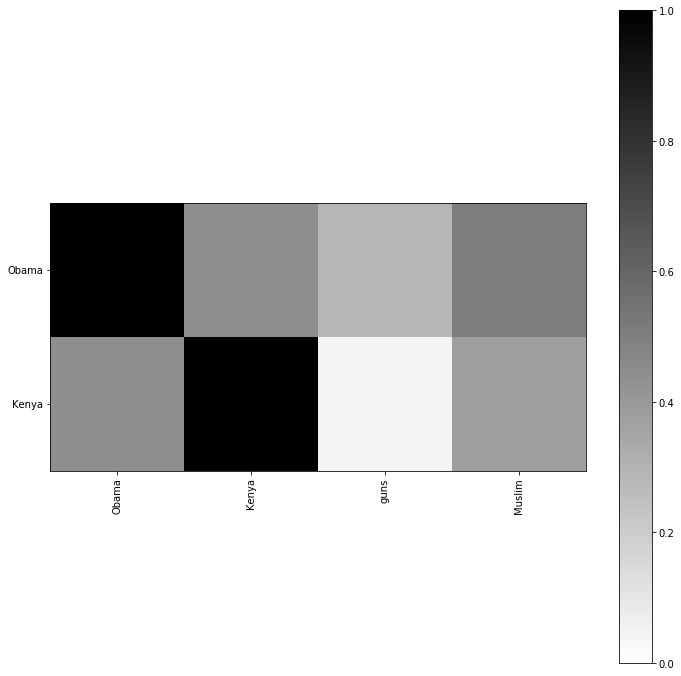

In [58]:
import matplotlib.pyplot as plt
print(np.shape(value_mesh[0]))
# fig, ax = plt.subplots(1,1)

# ax.imshow(value_mesh[0])
plt.figure(figsize=(12,12))
plt.imshow(np.transpose(value_mesh[0]), cmap='gray_r')
plt.clim(0,1)
plt.yticks(np.arange(len(r1_scored_vec)), 
           [keyword_tuple[1] for keyword_tuple in r1_scored_vec])
plt.xticks(np.arange(len(r2_scored_vec)), 
           [keyword_tuple[1] for keyword_tuple in r2_scored_vec], 
           rotation='vertical')
plt.colorbar()
plt.show()

In [59]:
print(value_mesh)

([[0.99999994, 0.44213256], [0.44213256, 1.0], [0.28555584, 0.0449827], [0.5048007, 0.3796451]], [[0, 0], [0, 0], [0, 0], [0, 0]])


In [60]:
def calculate_similarity_score(value_mesh):
    similarity_array = np.maximum.reduce([row for row in value_mesh[0]])
    weighted_similarity = np.multiply(similarity_array, [keyword_tuple[0] for keyword_tuple in r1_scored])
    weighted_similarity_sum = np.sum(weighted_similarity)
    sum_of_weights = np.sum([keyword_tuple[0] for keyword_tuple in r1_scored])
    weighted_similarity_sum_over_weights = weighted_similarity_sum/sum_of_weights
    return weighted_similarity_sum_over_weights

In [61]:
print(calculate_similarity_score(value_mesh))

0.9999999463231046


In [62]:
# Without preprocessing

In [71]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
from rake_nltk import Rake

nlp = spacy.load('en_core_web_lg')

def calculate_similarity_score(value_mesh, r1_scored, r2_scored):
    similarity_array = np.maximum.reduce([row for row in value_mesh[0]])
    weighted_similarity = np.multiply(similarity_array, [keyword_tuple[0] for keyword_tuple in r1_scored])
    weighted_similarity_sum = np.sum(weighted_similarity)
    sum_of_weights = np.sum([keyword_tuple[0] for keyword_tuple in r1_scored])
    weighted_similarity_sum_over_weights = weighted_similarity_sum/sum_of_weights
    return weighted_similarity_sum_over_weights

def phrase_vect(text):
    tokens = nlp(text)
    maxpool = np.maximum.reduce([token.vector for token in tokens])
    minpool = np.minimum.reduce([token.vector for token in tokens])
    # https://stackoverflow.com/questions/21816433/
    result = np.concatenate((minpool,maxpool))
    return result

def meshgrid(x,y): # DW code !!!
    return (
        [[x_ for x_ in x] for  _ in y],
        [[y_ for  _ in x] for y_ in y])

def cosine(u,v):
#     print(np.shape(u))
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

def calculate_claim_text(claim, text):
#     r1 = Rake()
#     r1.extract_keywords_from_text(claim)
    r1_scored = entities_text(claim)
    print(r1_scored)

#     r2 = Rake()
#     r2.extract_keywords_from_text(text)
    r2_scored = entities_text(text)
    print(r2_scored)
    
    # assign vectors
    r1_scored_vec = [[claim_keyword_tuple[0],  # keyword score
                      claim_keyword_tuple[1],  # keyword phrase
#                       claim_keyword_tuple[1].split(), # list of keyword
#                       len(claim_keyword_tuple[1].split()), # number of keyword
                      phrase_vect(claim_keyword_tuple[1])] for claim_keyword_tuple in r1_scored]
    print(len(r1_scored_vec))
    print(len(r1_scored_vec[0]))

    r2_scored_vec = [[text_keyword_tuple[0], 
                      text_keyword_tuple[1], 
                      phrase_vect(text_keyword_tuple[1])] for text_keyword_tuple in r2_scored]
    print(len(r1_scored_vec))
    print(len(r1_scored_vec[0]))
    
    
    # compare statements

    pair_mesh = meshgrid(r1_scored_vec, r2_scored_vec)
    value_mesh = meshgrid([0]*len(r1_scored_vec), [0]*len(r2_scored_vec))
    
    for i,_ in enumerate(pair_mesh[0]):
        for j,_ in enumerate(pair_mesh[0][0]): 
            vector1 = pair_mesh[0][i][j][2]
            vector2 = pair_mesh[1][i][j][2]

            value_mesh[0][i][j] = cosine(vector1, vector2)
            
    plt.figure(figsize=(12,12))
    plt.imshow(np.transpose(value_mesh[0]), cmap='gray_r')
    plt.clim(0,1)
    plt.yticks(np.arange(len(r1_scored_vec)), 
               [keyword_tuple[1] for keyword_tuple in r1_scored_vec])
    plt.xticks(np.arange(len(r2_scored_vec)), 
               [keyword_tuple[1] for keyword_tuple in r2_scored_vec], 
               rotation='vertical')
    plt.colorbar()
    plt.show()
            
    print(calculate_similarity_score(value_mesh, r1_scored, r2_scored))


In [72]:
"This is bad.".split()

['This', 'is', 'bad.']

[[0.7983086109161377, 'Donald trump'], [0.20169135928153992, 'reporter']]
[[0.6520990133285522, 'Donald Trump'], [0.21015027165412903, 'idiot'], [0.08425221592187881, 'reporter'], [0.05349848046898842, 'fun']]
2
3
2
3


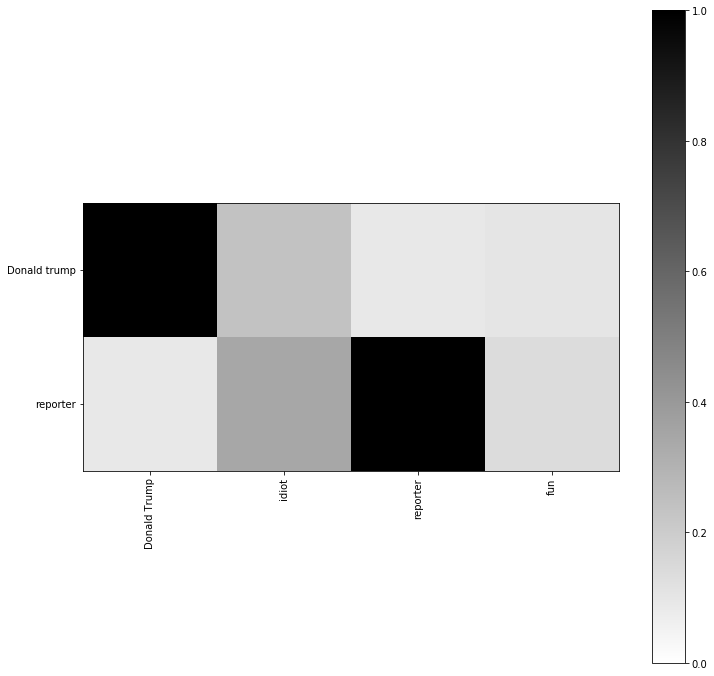

1.0


In [74]:
claim = "Donald trump mocked a disabled reporter."
text = "We can see how Donald Trump is an idiot from how he made fun of a disabled reporter."
calculate_claim_text(claim, text)